<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.955 · Models avançats de mineria de dades · PAC2</p>
<p style="margin: 0; text-align:right;">2020-1 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PAC 2: Mètodes no supervisats

Al llarg d'aquesta pràctica veurem com aplicar diferents tècniques no supervisades 
així com algunes de les aplicacions reals:

 - **Clustering amb diferents estratègies**: k-means i regla del colze, basades en densitat i jeràrquiques.
 - **Optimització amb reducció de dimensionalitat**: t-SNE.
 - **Aplicació**: identificació de punts d'interés turístics.




<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Nom i cognoms:</strong>
</div>

Pol Bieto Luengo

In [357]:
import geopandas as gpd
import pandas as pd

In [358]:
unitats_adms = gpd.read_file('0301100100_UNITATS_ADM_POLIGONS.json')
barris = unitats_adms[unitats_adms['TIPUS_UA']=='BARRI']
barris.to_file("barris.json", driver="GeoJSON")



### Eliminació de files duplicades

L'eliminació de files duplicades la portarem a terme en base a la variable link. Si tenim dues o més observacions 
del mateix pis de la web de Fotocasa, ens quedarem únicament amb la primera:


In [359]:
apartments = pd.read_csv('data_final_id.csv')
apartments.loc[apartments.duplicated('link')]


,id,address,bathrooms,building_subtype,building_type,conservation_state,date,discount,floor_elevator,is_new_construction,...,link,longitude,price,realestate,realestate_id,rooms,sqft_m2,neighbourhood,id_neighbourhood,neighb_meanprice
39,39,"Carrer de Picalquers, El Raval",1,Apartment,Flat,NaN,2020-12-14,0,0,False,...,/es/alquiler/vivienda/barcelona-capital/el-rav...,2.168707,525.0,INVERSIONES INMOBILIARIAS Y FINANCIERAS SANT A...,9202758138526,0,35,el raval,1.0,14.323614
40,40,"Carrer de Picalquers, El Raval",1,Apartment,Flat,NaN,2020-12-14,0,0,False,...,/es/alquiler/vivienda/barcelona-capital/el-rav...,2.168707,525.0,INVERSIONES INMOBILIARIAS Y FINANCIERAS SANT A...,9202758138526,0,35,el raval,1.0,14.323614
41,41,"Carrer de Picalquers, El Raval",1,Apartment,Flat,NaN,2020-12-14,0,0,False,...,/es/alquiler/vivienda/barcelona-capital/el-rav...,2.168707,525.0,INVERSIONES INMOBILIARIAS Y FINANCIERAS SANT A...,9202758138526,0,35,el raval,1.0,14.323614
42,42,"Carrer de Picalquers, El Raval",1,Apartment,Flat,NaN,2020-12-14,0,0,False,...,/es/alquiler/vivienda/barcelona-capital/el-rav...,2.168707,525.0,INVERSIONES INMOBILIARIAS Y FINANCIERAS SANT A...,9202758138526,0,35,el raval,1.0,14.323614
43,43,"Carrer de Picalquers, El Raval",1,Apartment,Flat,NaN,2020-12-14,0,0,False,...,/es/alquiler/vivienda/barcelona-capital/el-rav...,2.168707,525.0,INVERSIONES INMOBILIARIAS Y FINANCIERAS SANT A...,9202758138526,0,35,el raval,1.0,14.323614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11803,11803,Sarrià,2,Attic,Flat,1.0,2020-12-14,200,1,False,...,/es/alquiler/vivienda/barcelona-capital/aire-a...,2.121359,3700.0,Stipek Ferrer Premium Properties,9202765377715,4,280,sarrià,23.0,16.866645
11804,11804,Sarrià,2,Attic,Flat,1.0,2020-12-14,200,1,False,...,/es/alquiler/vivienda/barcelona-capital/aire-a...,2.121359,3700.0,Stipek Ferrer Premium Properties,9202765377715,4,280,sarrià,23.0,16.866645
12007,12007,Sant Gervasi- Galvany,5,Flat,Flat,2.0,2020-12-14,0,1,False,...,/es/alquiler/vivienda/barcelona-capital/aire-a...,2.141838,5300.0,Max Ricart,9202765879322,6,280,sant gervasi - galvany,26.0,15.275452
12061,12061,"Travessera de Gràcia, Sant Gervasi- Galvany",2,Apartment,Flat,NaN,2020-12-14,594,0,False,...,/es/alquiler/vivienda/barcelona-capital/aire-a...,2.147670,6073.0,Homelike,9202762567099,4,100,sant gervasi - galvany,26.0,15.275452


In [360]:
apartments = apartments.drop_duplicates('link')

### Neteja de dades

In [361]:

apartments = apartments.astype({
    'conservation_state': 'category',
    'building_subtype': 'category',
    'building_type': 'category',
    'floor_elevator': 'bool',
    'neighbourhood':'category',
    'id_neighbourhood':'category'
})
apartments.isna().sum()


id                        0
address                   0
bathrooms                 0
building_subtype          0
building_type             0
conservation_state     5340
date                      0
discount                  0
floor_elevator            0
is_new_construction       0
latitude                  0
link                      0
longitude                 0
price                     4
realestate              106
realestate_id             0
rooms                     0
sqft_m2                   0
neighbourhood             1
id_neighbourhood          1
neighb_meanprice          1
dtype: int64

Veiem que molts habitatges no tenen informació sobre l'estat de conservació. Omplirem amb -1 aquells que no en tinguin:



In [362]:
apartments['conservation_state'] = apartments['conservation_state'].cat.add_categories(-1)
apartments['conservation_state'] = apartments['conservation_state'].fillna(-1)

In [363]:
apartments = apartments.dropna(subset=['realestate'])
apartments = apartments.dropna(subset=['price'])
apartments.isna().sum()

id                     0
address                0
bathrooms              0
building_subtype       0
building_type          0
conservation_state     0
date                   0
discount               0
floor_elevator         0
is_new_construction    0
latitude               0
link                   0
longitude              0
price                  0
realestate             0
realestate_id          0
rooms                  0
sqft_m2                0
neighbourhood          1
id_neighbourhood       1
neighb_meanprice       1
dtype: int64

Finalment, ens queda omplir manualment les observacions que no tenen barri, de nou, mitjançant l'enllaç de Fotocasa per veure si podem determinar aquesta informació:



In [364]:
apartments[apartments.neighbourhood.isna()]

,id,address,bathrooms,building_subtype,building_type,conservation_state,date,discount,floor_elevator,is_new_construction,...,link,longitude,price,realestate,realestate_id,rooms,sqft_m2,neighbourhood,id_neighbourhood,neighb_meanprice
1384,1384,"Carrer de la Mare de Déu de Port, La Marina de...",1,Flat,Flat,-1.0,2020-12-14,0,False,False,...,/es/alquiler/vivienda/barcelona-capital/la-mar...,2.148532,750.0,FINCAS LAFONT,9202763692267,3,70,NaN,NaN,NaN


In [365]:
marina = apartments[apartments['neighbourhood']=='la marina de port'].head(1)

apartments.loc[apartments.id ==1384, 'neighbourhood'] = 'la marina de port'
apartments.loc[apartments.id ==1384, 'neighb_meanprice'] = marina['neighb_meanprice'].values[0]
apartments.loc[apartments.id ==1384, 'id_neighbourhood'] = marina['id_neighbourhood'].values[0]

### Outliers

El que primer farem, serà visualitzar a gràfics de tipus boxplot cadascuna de les variables quantitatives per tal de determinar si tenim o no outliers:



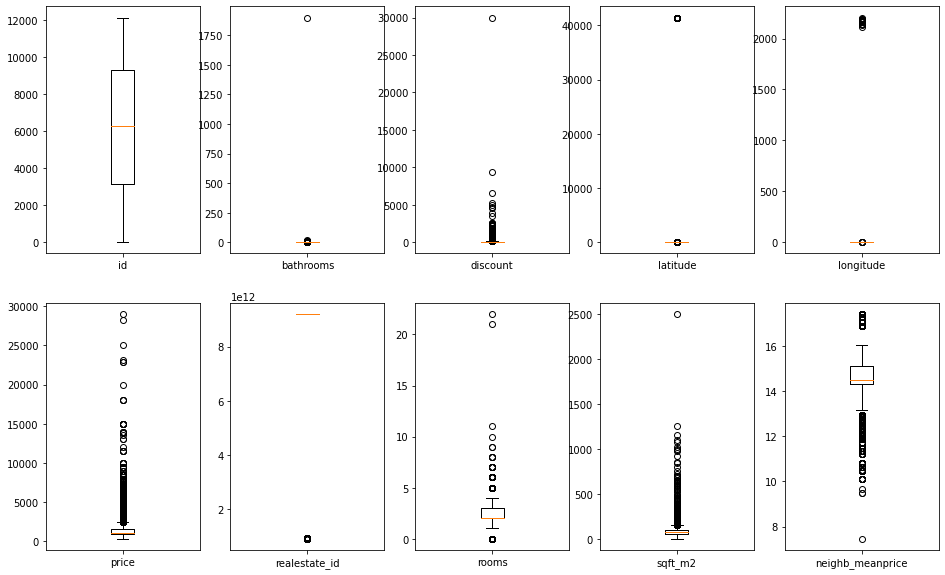

In [366]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import math

fig = plt.figure(figsize=(16,10))
numeric_attributes = apartments.select_dtypes(include=np.number).columns
for idx, column in enumerate(numeric_attributes):
    ax = fig.add_subplot(2, math.ceil(len(numeric_attributes)/2), idx+1)
    ax.boxplot(apartments[[column]], labels=[column])

Eliminem les que tinguin un descompte més elevat que el preu 

In [367]:
apartments = apartments[apartments.discount < apartments.price]
apartments = apartments[apartments.price < 10000]

Arreglem les dades de la longitud/latitud:

In [368]:
apartments.loc[apartments['latitude'] > 100, 'latitude'] = apartments['latitude']/1000
apartments.loc[apartments['longitude'] > 100, 'longitude'] = apartments['longitude']/1000

Arreglem les dades de bathroom:

In [369]:
apartments.bathrooms.max()

1901

In [370]:
apartments = apartments.drop(index=10875)
apartments.bathrooms.max()

8

In [371]:
apartments = apartments[apartments['sqft_m2'] != 0]

### Transformació de dades

Afegirem una nova variable que calculi la diferència de cada habitatge sobre el preu mig del barri:



In [372]:
apartments['diff_mitjana'] = ((apartments['price']/(apartments.neighb_meanprice*apartments.sqft_m2))-1)*100

### Construïm les dades finals:

In [373]:
dades_barri = apartments.groupby(['id_neighbourhood']).mean()[['diff_mitjana','price','sqft_m2','discount']]

dades_barri = dades_barri.reset_index()
dades_barri.rename(columns={'id_neighbourhood':'CODI_UA'}, inplace=True)
dades_barri

,CODI_UA,diff_mitjana,price,sqft_m2,discount
0,1.0,18.188422,1046.520992,65.929389,59.543893
1,2.0,33.715622,1406.701843,81.169179,57.237856
2,3.0,23.942516,970.831050,47.214612,57.456621
3,4.0,63.485049,1316.905904,72.900369,54.588561
4,5.0,19.658284,1233.177083,78.088542,42.708333
...,...,...,...,...,...
61,68.0,22.040837,1408.461538,82.336996,48.029304
62,69.0,30.804632,2368.282609,103.684783,55.695652
63,70.0,34.077455,1204.282051,78.461538,41.282051
64,72.0,0.076791,892.181818,76.000000,13.848485


In [374]:
apartments.loc[apartments.realestate.astype(str).str.contains('TECNOCASA'),'realestate'] = 'TECNOCASA'
apartments.loc[apartments.realestate.astype(str).str.contains('tecnocasa'),'realestate'] = 'TECNOCASA'
realstate_by_neigh = apartments.groupby(['id_neighbourhood','realestate']).size()

In [375]:
realstate_by_neigh.max()

163

In [376]:
state_pcts = realstate_by_neigh.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

majoritary_realstate = state_pcts[state_pcts > 5]

In [377]:
dades_barri['CODI_UA'] = dades_barri['CODI_UA'].apply(np.int64)
dades_barri['CODI_UA'] = dades_barri['CODI_UA'].apply('{:0>2}'.format)

In [378]:
df  = barris.merge(dades_barri, on='CODI_UA', how='left')
gdf = gpd.GeoDataFrame(df)


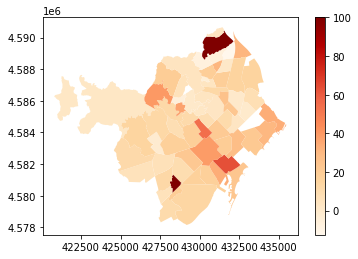

In [380]:
fig, ax = plt.subplots(1, 1)
#missing_kwds={"color": "lightgrey", "edgecolor": "red","hatch": "///","label": "Missing values",}
gdf.plot(column='diff_mitjana', cmap='OrRd', vmax=100, ax=ax, legend=True);

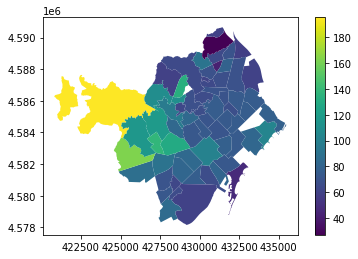

In [381]:
fig, ax = plt.subplots(1, 1)
gdf.plot(column='sqft_m2',ax=ax, legend=True);

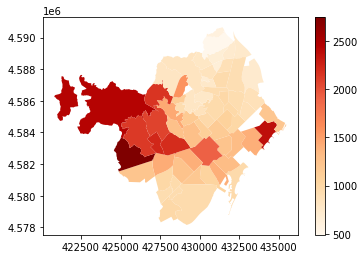

In [382]:
fig, ax = plt.subplots(1, 1)
gdf.plot(column='price', cmap='OrRd', ax=ax, legend=True);

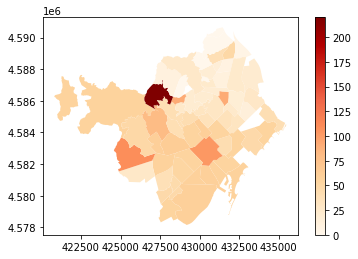

In [383]:
fig, ax = plt.subplots(1, 1)
gdf.plot(column='discount', cmap='OrRd', ax=ax, legend=True);

In [384]:
gdf.to_file("countries.geojson", driver='GeoJSON')
apartments.to_csv('../csv/data_clean.csv')

Canvi en el sistema de coordenades

In [1]:
!ogr2ogr -f GeoJSON -s_srs EPSG:25831 -t_srs "EPSG:4326" countries_marcatora.geojson countries.geojson 